In [2]:
#conda install jupyter scikit-learn pydotplus sklearn-pandas matplotlib

%matplotlib inline

In [26]:
import numpy as np #library to work with matrices

random_seed = 28 #choose your own random seed
np.random.seed(random_seed)

In [2]:

############Adjustments##############

#options
PATH_DI06C001 = '/media/sf_SF/Stage2021/targetedQE/' 

## Adjustments
path = PATH_DI06C001

filename_Y_labels = 'total_y_matrix_with_binary_label.txt'

########################



# load libraries
import pandas as pd
import os
import random
from PIL import Image
import numpy as np


#set paths
path_data_in = path + 'data/input/' + 'MachineLearning/'
path_data_out = path + 'data/output/' + 'MachineLearning/'
path_data_X = path_data_in + 'Xarrays/' #png's
path_data_y = path_data_in + 'Yarrays/' #labels



## Y
#load all Y labels together
filename = path_data_y + filename_Y_labels
# print(filename)

y = pd.read_csv(filename, sep='\t')



## X
#list all X files and devide in train OR test folder
filenames_X_train = []
filenames_X_test = []
directory_list = os.listdir(path_data_X)
# print(directory_list)

#random order list with filenames
random.shuffle(directory_list)

i = 0
for filename in directory_list:
    #print (filename) #all files, folders
    #print (i)
    if ".png" in filename:
        #print (filename)
        if i % 3 == 0: 
            #1/3th of data is test set, rest in train
            #print(i)
            filenames_X_test.append(path_data_X + filename)
        else:
            filenames_X_train.append(path_data_X + filename)
        i = i + 1
        
 #check ok? 70-30 devide train - test? ok     
print(len(filenames_X_train))
print(len(filenames_X_test))


## load X data + Merge per train/test X's with Y to S1
#keep only non unique values


def load_X_if_matched_in_y(filenames_list, y):
    all_images_as_array=[]
    label=[]    
    # match = 0
    # no_match = 0
    for filename in filenames_list:
        #print(filename)
        #filename = filenames_X_train[3]
        filename_wopath = filename.split('Xarrays/')[1]
        #filename_wopath = filename_wopath[:-4] #wo .png todo, see same x/y !!!
        # print(filename_wopath)
    
        matching_y = y[y.png==filename_wopath]
        if len(matching_y) == 1:
            label.append(matching_y.iloc[0,2]) #1st elem contains string NF/FOUND
            
            #load figure correctly as array [[], [], []]]
            img=Image.open(filename)
            np_array = np.asarray(img)
            l,b,c = np_array.shape    
            np_array = np_array.reshape(l*b*c,)   
            all_images_as_array.append(np_array)
            # match = match + 1
            
        if len(matching_y) != 1:
            # print("no or multiple match(es) in y found for: " + filename)
            # no_match = no_match + 1
            continue

    return np.array(all_images_as_array), np.array(label)
    

#if re.match(filename_wopath, y.Name[0]): #todo search in volled colom, ev niet via regress want wo .png moet volled zelfde
        


X_train,y_train = load_X_if_matched_in_y(filenames_X_train, y)
X_test, y_test = load_X_if_matched_in_y(filenames_X_test, y)


# print(X_train)
# print(len(y_train))
# print(X_test)
# print(len(y_test))



3406
1704


In [7]:
from sklearn.tree import DecisionTreeClassifier
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_depth : int, default=None
 |      The maximum depth of the tree. If None, then nodes are expanded until
 |      all leaves are pure or until all leaves contain less than
 |      min_samples_split samples.
 |  
 |  min_samples_split : int or float, default=2
 |      The minimum 

In [8]:
cls_DT = DecisionTreeClassifier()

In [9]:
cls_DT

DecisionTreeClassifier()

In [4]:
#train fold to fit the model
print(X_train.shape)
print(y_train.shape)

#validation fold to make decisions about hyperparameters
print(X_test.shape)
print(y_test.shape)

(2345, 16384)
(2345,)
(1170, 16384)
(1170,)


Fit a decision tree model with default paramters on the `train_X` data set.

In [10]:
#solution
cls_DT.fit(X_train,y_train)


DecisionTreeClassifier()

What is the accuracy on `train_X`? 

In [16]:
train_X = X_train 
train_y = y_train 
val_X = X_test
val_y = y_test

In [14]:
#solution
from sklearn.metrics import accuracy_score

predictions_train = cls_DT.predict(train_X)
print("Accuracy: %f"%(accuracy_score(predictions_train, train_y)))

Accuracy: 0.968017


What is the accuracy on `val_X`?

In [17]:
#solution
predictions_val = cls_DT.predict(val_X)
print("Accuracy: %f"%(accuracy_score(predictions_val, val_y)))

Accuracy: 0.791453


What do you see?

A different metric to evaluate the performance of you model is the `roc_auc_score` metric. What is the performance of your model on `train_X` and `val_X` using this new metric?

In [18]:
#solution
from sklearn.metrics import roc_auc_score
print("ROC AUC on train: %f"%(roc_auc_score(predictions_train,train_y)))
print("ROC AUC on train: %f"%(roc_auc_score(predictions_val,val_y)))

ROC AUC on train: 0.966630
ROC AUC on train: 0.768840



# 4. Hyperparameters

Let's look at the  `DecisionTreeClassifier` again.

In [19]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_depth : int, default=None
 |      The maximum depth of the tree. If None, then nodes are expanded until
 |      all leaves are pure or until all leaves contain less than
 |      min_samples_split samples.
 |  
 |  min_samples_split : int or float, default=2
 |      The minimum 

Notice that there are many parameters (**hyperparameters**) that influence the contruction of a decision tree. One of them is `max_depth` that limits the depth of the contructed decicison tree. The following code evaluates different values for this hyperparameter.

In [20]:
for maxdepth in range(3,60,1):
    cls = DecisionTreeClassifier(max_depth=maxdepth)
    cls.fit(train_X,train_y)
    predictions_train = cls.predict(train_X)
    predictions_val = cls.predict(val_X)
    print("%i %f %f"%(maxdepth,roc_auc_score(predictions_train, train_y),roc_auc_score(predictions_val, val_y)))
    ##better use roc_auc_score for the 

3 0.744816 0.715569
4 0.774615 0.733751
5 0.797341 0.752191
6 0.819442 0.759795
7 0.837437 0.778505
8 0.850148 0.775071
9 0.851810 0.771818
10 0.857769 0.773284
11 0.895361 0.785935
12 0.915350 0.784303
13 0.929858 0.782358
14 0.937415 0.769988
15 0.948221 0.759516
16 0.949507 0.764037
17 0.954712 0.762164
18 0.955688 0.758677
19 0.959913 0.756715
20 0.961249 0.761534
21 0.963201 0.755139
22 0.963201 0.772429
23 0.964567 0.757616
24 0.964567 0.759062
25 0.964567 0.771780
26 0.964567 0.753968
27 0.965568 0.755139
28 0.966238 0.749723
29 0.965903 0.738973
30 0.965957 0.749540
31 0.965903 0.756771
32 0.966238 0.758741
33 0.966909 0.763372
34 0.966909 0.747792
35 0.966909 0.758618
36 0.966630 0.758103
37 0.966630 0.758889
38 0.966630 0.764262
39 0.966630 0.762803
40 0.966630 0.756901
41 0.966630 0.756975
42 0.966630 0.754447
43 0.966630 0.756585
44 0.966630 0.765000
45 0.966630 0.769832
46 0.966630 0.758812
47 0.966630 0.766449
48 0.966630 0.765031
49 0.966630 0.764058
50 0.966630 0.769504

Construct a decision tree with `max_depth` equal to `None` and print the first 20 predictions on the train set. 

In [21]:
#solution
cls = DecisionTreeClassifier(max_depth=13)
cls.fit(train_X,train_y)
predictions_train = cls.predict(train_X)
predictions_val = cls.predict(val_X)
print(predictions_train[0:20])

[1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]


These are binary class predictions (0 or 1). Sometimes it makes sense to predict the **probability** of a data point to belong to a certain class (typically class 1 which is also known as the positive class).

In [22]:
predictions_train = cls.predict_proba(train_X)
print(predictions_train[0:20])
predictions_val = cls.predict_proba(val_X)
print(predictions_val[0:20])

[[0.00996016 0.99003984]
 [1.         0.        ]
 [0.40776699 0.59223301]
 [1.         0.        ]
 [0.06       0.94      ]
 [0.06       0.94      ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.40776699 0.59223301]
 [0.         1.        ]
 [0.92307692 0.07692308]
 [0.12857143 0.87142857]
 [0.00996016 0.99003984]
 [0.00996016 0.99003984]
 [0.         1.        ]
 [0.00996016 0.99003984]
 [0.40776699 0.59223301]
 [0.40776699 0.59223301]]
[[0.9144385  0.0855615 ]
 [0.00996016 0.99003984]
 [0.06       0.94      ]
 [1.         0.        ]
 [0.20930233 0.79069767]
 [0.06       0.94      ]
 [0.40776699 0.59223301]
 [1.         0.        ]
 [0.06       0.94      ]
 [0.625      0.375     ]
 [0.00996016 0.99003984]
 [0.00996016 0.99003984]
 [0.20930233 0.79069767]
 [0.06       0.94      ]
 [0.00996016 0.99003984]
 [0.92307692 0.07692308]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.93617021 0.06382979]

The first column shows the probability of a data point to belong to class 0 and the second column shows the probability of a data point to belong to class 1. What do you see? Why is this?

Can you contruct a decision tree that does not just output 0 or 1 probabilities? In other words, what value for max_depth do you choose?

In [24]:
#solution
predictions_test = cls.predict_proba(X_test)
print(predictions_test)

[[0.9144385  0.0855615 ]
 [0.00996016 0.99003984]
 [0.06       0.94      ]
 ...
 [0.9144385  0.0855615 ]
 [1.         0.        ]
 [0.         1.        ]]


Play with the hyperparameters and make some Kaggle submissions.
After you have identified the best settings, don't forget to **train your model on the full dataset**, before evaluating your model on the test set.

The Kaggle submission should contain two columns:
<ul>
    <li>index: the index column of the test set</li>
    <li>eyeDetection: the prediction probability of class label 1</li>
</ul>


# 5. Ensemble learning: bagging

We have seen that bias and variance play an important role in Machine Learning. Let's first see what bagging can do for our data set. 

In [27]:
from sklearn.ensemble import BaggingClassifier

cls_bagged = BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=random_seed)
                                                            
cls_bagged.fit(train_X,train_y)
predictions_train = cls_bagged.predict(train_X)
predictions_val = cls_bagged.predict(val_X)
print("Accuracy %f %f"%(accuracy_score(predictions_train, train_y),accuracy_score(predictions_val, val_y)))
print("ROC %f %f"%(roc_auc_score(predictions_train, train_y),roc_auc_score(predictions_val, val_y)))

help(BaggingClassifier)

Accuracy 0.962473 0.835043
ROC 0.965402 0.820151
Help on class BaggingClassifier in module sklearn.ensemble._bagging:

class BaggingClassifier(sklearn.base.ClassifierMixin, BaseBagging)
 |  A Bagging classifier.
 |  
 |  A Bagging classifier is an ensemble meta-estimator that fits base
 |  classifiers each on random subsets of the original dataset and then
 |  aggregate their individual predictions (either by voting or by averaging)
 |  to form a final prediction. Such a meta-estimator can typically be used as
 |  a way to reduce the variance of a black-box estimator (e.g., a decision
 |  tree), by introducing randomization into its construction procedure and
 |  then making an ensemble out of it.
 |  
 |  This algorithm encompasses several works from the literature. When random
 |  subsets of the dataset are drawn as random subsets of the samples, then
 |  this algorithm is known as Pasting [1]_. If samples are drawn with
 |  replacement, then the method is known as Bagging [2]_. When

Can you make a submission to Kaggle?

In [29]:
#solution
cls_bagged = BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=random_seed,warm_start=True)
                                                            
cls_bagged.fit(train_X,train_y)
predictions_test=cls_bagged.predict_proba(X_test)



With the `RandomForestClassifier` the variance of the decision tree is reduced also by selecting features for decision tree contruction at random. Let's see how far we get with default hyperparameter values.   

In [30]:
from sklearn.ensemble import RandomForestClassifier

cls_RF = RandomForestClassifier(random_state=random_seed)
cls_RF.fit(train_X,train_y)
predictions_train = cls_RF.predict(train_X)
predictions_val = cls_RF.predict(val_X)
print("Accuracy %f %f"%(accuracy_score(predictions_train, train_y),accuracy_score(predictions_val, val_y)))
print("ROC %f %f"%(roc_auc_score(predictions_train, train_y),roc_auc_score(predictions_val, val_y)))

Accuracy 0.968017 0.871795
ROC 0.971887 0.864295


Now let's see what we can do with the `RandomForestClassifier`.

In [31]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : int, default=100
 |      The number of trees in the forest.
 |  
 |      .. versionchanged:: 0.22
 |         The default value of ``n_estimators`` changed from 10 to 100
 |         in 0.22.
 |  
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini 

What happens when you increase the `n_estimators` hyperparameter? 

In [ ]:
#solution


Now select the best `n_estimators` value and make a submission to Kaggle.

In [ ]:
#solution


>1 0.825 (0.020)
>2 0.833 (0.020)
>3 0.838 (0.028)
>4 0.836 (0.029)
>5 0.832 (0.030)
>6 0.828 (0.027)
>7 0.829 (0.029)
>8 0.825 (0.027)
>9 0.828 (0.026)
>10 0.825 (0.029)


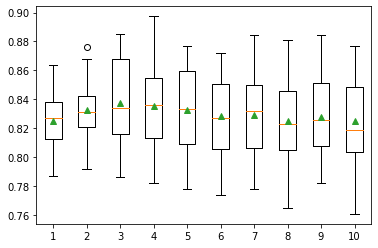

In [32]:
# explore bagging ensemble k for knn effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
	models = dict()
	# evaluate k values from 1 to 20
	for i in range(1,11):
		# define the base model
		base = KNeighborsClassifier(n_neighbors=i)
		models[str(i)] = BaggingClassifier(base_estimator=base)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, train_X, train_y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, train_X, train_y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, train_X, train_y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [101]:
base = KNeighborsClassifier(n_neighbors=4)
bag = BaggingClassifier(base_estimator=base,random_state=random_seed,warm_start=True)
bag.fit(X,y)

predictions_test=bag.predict_proba(test)

out_tmp = pd.DataFrame()
out_tmp["index"] = index_col
out_tmp["eyeDetection"] = predictions_test[:,1]
print(out_tmp.head())
out_tmp.to_csv("bagged_KNC_4.csv",index=False)



   index  eyeDetection
0      0           1.0
1      1           0.2
2      2           0.0
3      3           0.0
4      4           0.0


# 6. Ensemble learning: boosting

A second type of Ensemble learning is **boosting**. What does boosting do?

Can you make use of the `GradientBoostingClassifier` with `random_state=random_seed` and `max_depth=10`?

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special case where only a sin

In [ ]:
#solution
boost = GradientBoostingClassifier(random_state=random_seed,max_depth=13)
bag.fit(X,y)

predictions_test=bag.predict_proba(test)

out_tmp = pd.DataFrame()
out_tmp["index"] = index_col
out_tmp["eyeDetection"] = predictions_test[:,1]
print(out_tmp.head())
out_tmp.to_csv("bagged_KNC_2.csv",index=False)

>10 0.921 (0.010)
>11 0.920 (0.008)
>12 0.917 (0.010)
>13 0.915 (0.010)
>14 0.913 (0.011)
>15 0.906 (0.010)
>16 0.891 (0.015)
>17 0.863 (0.020)
>18 0.835 (0.017)
>19 0.827 (0.020)
>20 0.825 (0.016)


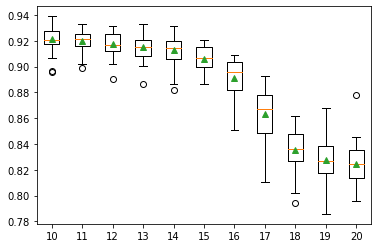

In [83]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# evaluate k values from 1 to 20
	for i in range(10,21):
		models[str(i)] = GradientBoostingClassifier(random_state=random_seed,max_depth=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, train_X, train_y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, train_X, train_y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, train_X, train_y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Can you optimize the `max_depth` and `n_estimators` hyperparameters and make a Kaggle submission?

In [ ]:
#solution


# 7. Logistic regression

Before we evaluate other Machine Learning algorithms such as logistic regression we need to look at the distributions and scales of the features. In fact, this should always be the first thing to do when analyzing a new data set.

In Pandas we can create a boxplot for each of the features as follows:

<AxesSubplot:>

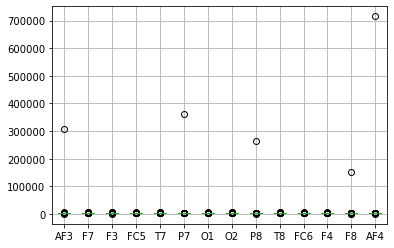

In [84]:
X.boxplot()

What do we see?

There are many approaches to outlier detection and removal. Let's use a simple one:

In [85]:
from scipy import stats

print(X.shape)
tmp = (np.abs(stats.zscore(X)) < 3).all(axis=1)
X_clean = X[tmp]
y_clean = y[tmp]
print(X_clean.shape)

(10037, 14)
(9990, 14)


<AxesSubplot:>

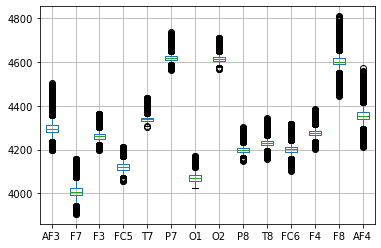

In [86]:
X_clean.boxplot()

This should look much better.

However, feature values between features are still at very different scales. We need to normalize them. 

In [87]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_clean)
X_norm = pd.DataFrame(scaler.transform(X_clean),columns=X_clean.columns)

<AxesSubplot:>

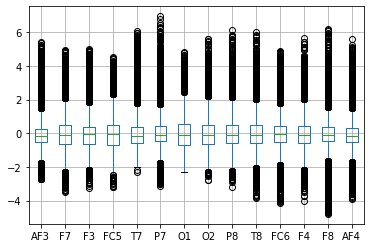

In [88]:
X_norm.boxplot()

Now each feature is at a similar scale.

Let's start with `LogisticRegression`.

In [89]:
from sklearn.linear_model import LogisticRegression

train_X, val_X, train_y, val_y = train_test_split(X_norm,y_clean,test_size=.2, random_state=random_seed)

cls_LR=LogisticRegression()
cls_LR.fit(train_X,train_y)
predictions_train = cls_LR.predict(train_X)
predictions_val = cls_LR.predict(val_X)
print("%f %f"%(accuracy_score(predictions_train, train_y),accuracy_score(predictions_val, val_y)))

0.645646 0.646647


Does this perform well?

What could be the reason?


# 8. Neural Networks

How about a Neural Network? To construct a neural network, we make use of the `MLPClassifier`.

In [90]:
from sklearn.neural_network import MLPClassifier
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network._multilayer_perceptron:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity

An example MLP neural network with 2 hidden layers (60 and 10 nodes, respect

In [91]:
cls_MLP=MLPClassifier(hidden_layer_sizes=(60,10))
cls_MLP.fit(train_X,train_y)
predictions_train = cls_MLP.predict(train_X)
predictions_val = cls_MLP.predict(val_X)

print("%f %f"%(accuracy_score(predictions_train, train_y),accuracy_score(predictions_val, val_y)))

0.973348 0.936937


/home/guest/miniconda3/envs/data_mining/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Compare the default activation function with the sigmoid function `logistic`:

In [92]:
#solution


Is feature normalization required?

In [93]:
train_X, val_X, train_y, val_y = train_test_split(X,y,test_size=.2, random_state=random_seed)

cls_MLP=MLPClassifier(hidden_layer_sizes=(60,10))
cls_MLP.fit(train_X,train_y)
predictions_train = cls_MLP.predict(train_X)
predictions_val = cls_MLP.predict(val_X)

print("%f %f"%(accuracy_score(predictions_train, train_y),accuracy_score(predictions_val, val_y)))

0.456968 0.465637


Try different values for the hyperparameters of the `MLPClassifier`. Make a submission to Kaggle.

In [94]:
#solution
